<a href="https://colab.research.google.com/github/KirpaDmitriy/AIAlgsImplementation/blob/main/linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4 "Линейная классификация"
## Студент: Кирпа Дмитрий
## Преподаватель: Мангараков Александр

## Подключение зависимостей

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

## Набор данных

In [ ]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
features = data[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']]

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

data[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
              ] = normalized_features

In [ ]:
X = data.drop(columns=['Gender'])
y = data.Gender

In [ ]:
labelencoder = LabelEncoder()
X['Workout_Type'] = labelencoder.fit_transform(X['Workout_Type'])
y = np.where(y == 'Male', 1, -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
514,1.175929,-0.271491,-1.351930,-1.378836,-0.890427,0.379198,0.447932,-0.273108,1,0.179538,-0.711193,0.743295,0.257176,0.516394
583,0.518827,-1.540562,-1.116921,1.312192,1.690177,1.198501,0.622932,0.754409,1,0.595126,-0.044375,-1.448299,-1.095432,-1.263565
926,0.026000,1.341976,1.703197,1.051770,-0.681189,-1.669061,-1.068735,-0.915307,3,-0.331954,-0.377784,-0.352502,-1.095432,0.340652
850,0.765240,-0.224313,-0.960247,0.964962,1.550685,-1.259409,0.243765,0.350742,2,0.179538,-1.044602,0.743295,0.257176,0.312112
423,0.354552,1.040041,0.998168,0.530926,0.922970,0.242647,0.068765,0.328723,3,0.435284,1.289262,-1.448299,-1.095432,0.466826


In [ ]:
X.dtypes

,0
Age,float64
Weight (kg),float64
Height (m),float64
Max_BPM,float64
Avg_BPM,float64
Resting_BPM,float64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,int64
Fat_Percentage,float64


In [ ]:
y[:10]

array([ 1, -1, -1,  1,  1, -1,  1, -1,  1,  1])

## Вычисление отступа объекта

In [ ]:
def margin(w, x, y):
    return y * np.dot(w, x)

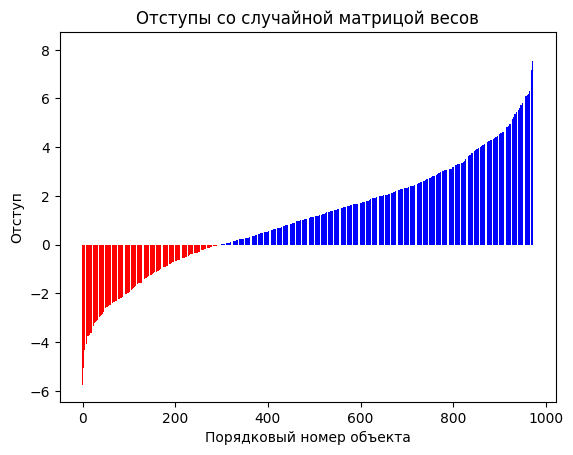

In [ ]:
def visualize_margin(w, X, y, title):
    margins = sorted([margin(w, x_i, y_i) for x_i, y_i in zip(X, y)])
    plt.bar(range(len(margins)), margins, color=['red' if m < 0 else 'blue' for m in margins])
    plt.xlabel('Порядковый номер объекта')
    plt.ylabel('Отступ')
    plt.title(title)
    plt.show()

visualize_margin(np.random.rand(X.shape[1]), X.to_numpy(), y, title='Отступы со случайной матрицой весов')

## Классификатор

### Метод стохастического градиентного спуска с инерцией

In [ ]:
MAX_VALUE = 500

def clip_gradients(gradient, max_value):
    return np.clip(gradient, -max_value, max_value)

def l2_penalty_gradient(w, alpha=0):
    return alpha * w

def compute_loss_gradient(w, x, y, reg_alpha=0):
    return clip_gradients(2 * (np.dot(w, x) - y) * x + l2_penalty_gradient(w, reg_alpha), MAX_VALUE)

Для дальнейшего сравнение сделал через кол-во эпох, а не до сходимости

In [ ]:
def sgd_momentum(
    X, y, lr=0.01, epochs=50, gamma=0.9, initial_weights=None, reg_alpha=0, selection=None
    ):
    if initial_weights is None:
        w = np.zeros(X.shape[1])
    else:
        w = initial_weights

    v = np.zeros(X.shape[1])

    for epoch in range(epochs):
        if selection:
          X, y = selection(X, y, w)
        # выбрать объект xi из Xl случайным образом
        indices = np.random.permutation(len(y))
        for i in indices:
            gradient = compute_loss_gradient(
                w, X[i], y[i], reg_alpha=reg_alpha
                )
            v = gamma * v + lr * gradient
            w -= v
            # рекуррентный для скорости
            Q = (1 - alpha) * Q + alpha * (np.dot(w, X[i]) - y[i]) ** 2

    return w

### Скорейший градиентный спуск

In [ ]:
def compute_step_length(x, grad, X, y):
    num = np.dot(grad.T, grad)
    den = np.dot((X.dot(grad)).T, X.dot(grad))
    return num / den if den != 0 else 1.0

def steepest_gradient_descent(X, y, epochs, initial_weights=None, selection=None):
    if initial_weights is None:
        w = np.zeros(X.shape[1])
    else:
        w = initial_weights

    for epoch in range(epochs):
        if selection:
          X, y = selection(X, y, w)
        grad = -2 * X.T.dot(y - X.dot(w))
        step_length = compute_step_length(w, grad, X, y)
        w -= step_length * grad

        if np.linalg.norm(step_length * grad) < 1e-6:
            break

    return w

### Предъявление объектов по модулю отступа

Выбор объектов для обучения на основе величины их отступа. Объекты с малым абсолютным отступом (т.е., те, которые находятся ближе всего к границе решения) представляют больший интерес, так как они являются наиболее трудными случаями классификации.

In [ ]:
def margin_based_presentation(X, y, w):
    margins = np.array([margin(w, X[i], y[i]) for i in range(len(X))])
    indices = np.argsort(np.abs(margins))
    return X[indices], y[indices]

### Инициализация весов через корреляцию

In [ ]:
def correlation_based_initialization(X, y):
    return np.array([np.corrcoef(X[:, i], y)[0, 1] for i in range(X.shape[1])])

### Случайная инициализация весов через мультистарт

In [ ]:
def multi_start_training(X, y, method, num_starts=10, epochs=50):
    best_w = None
    best_loss = np.inf

    for _ in range(num_starts):
        initial_w = np.random.randn(X.shape[1])
        w = method(X, y, epochs=epochs, initial_weights=initial_w)
        current_loss = np.mean(np.log(1 + np.exp(-y * (X.dot(w)))))
        if current_loss < best_loss:
            best_loss = current_loss
            best_w = w

    return best_w

### Обучение и оценка качества

Моментум:

In [ ]:
w_momentum = sgd_momentum(X_train.to_numpy(), y_train, epochs=100)

In [ ]:
w_momentum_reg = sgd_momentum(X_train.to_numpy(), y_train, epochs=100, reg_alpha=0.01)

In [ ]:
w_momentum_corr = sgd_momentum(
    X_train.to_numpy(),
    y_train,
    initial_weights=correlation_based_initialization(
        X_train.to_numpy(), y_train
        ),
    epochs=100
    )

In [ ]:
w_momentum_multistart = multi_start_training(X_train.to_numpy(), y_train, method=sgd_momentum, epochs=100)

<ipython-input-142-f4ac264a85d5>:8: RuntimeWarning: overflow encountered in exp
  current_loss = np.mean(np.log(1 + np.exp(-y * (X.dot(w)))))


In [ ]:
w_momentum_selection = sgd_momentum(X_train.to_numpy(), y_train, epochs=100, selection=margin_based_presentation)

Наискорейший спуск:

In [ ]:
w_steepest = steepest_gradient_descent(X, y, 100)

In [ ]:
w_steepest_corr = steepest_gradient_descent(
    X, y, 100, initial_weights=correlation_based_initialization(
        X_train.to_numpy(), y_train
        )
    )

In [ ]:
w_steepest_multistart = multi_start_training(X_train.to_numpy(), y_train, method=steepest_gradient_descent, epochs=100)

In [ ]:
w_steepest_selection = steepest_gradient_descent(X_train.to_numpy(), y_train, epochs=100, selection=margin_based_presentation)

Метод оценки качества:

In [ ]:
def predict(w, X):
    return np.sign(np.dot(X, w))

def quality(w, X, y):
  predictions = predict(w, X)
  print('Точность классификации:', accuracy_score(y, predictions))

Моментум:

In [ ]:
quality(w_momentum, X_test, y_test)

Точность классификации: 0.4589041095890411


In [ ]:
quality(w_momentum_reg, X_test, y_test)

Точность классификации: 0.6232876712328768


In [ ]:
quality(w_momentum_corr, X_test, y_test)

Точность классификации: 0.678082191780822


In [ ]:
quality(w_momentum_multistart, X_test, y_test)

Точность классификации: 0.6917808219178082


In [ ]:
quality(w_momentum_selection, X_test, y_test)

Точность классификации: 0.702054794520548


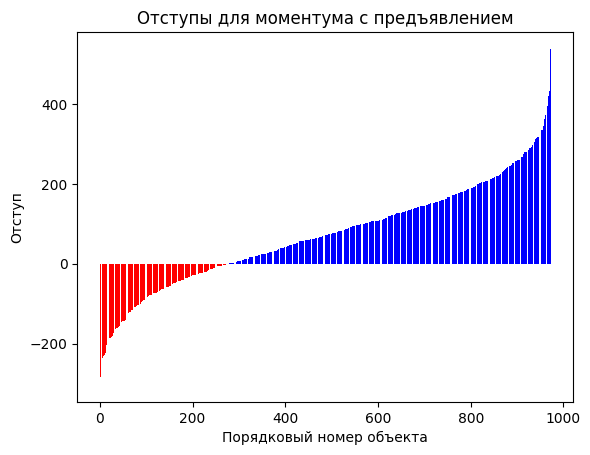

In [ ]:
visualize_margin(w_momentum_selection, X.to_numpy(), y, title="Отступы для моментума с предъявлением")

In [ ]:
(
    np.linalg.norm(w_momentum),
    np.linalg.norm(w_momentum_reg),
    np.linalg.norm(w_momentum_corr),
    np.linalg.norm(w_momentum_multistart),
    np.linalg.norm(w_momentum_selection)
)

(489.74929841268585,
 147.76011690791185,
 481.6858516262057,
 412.02530768546546,
 173.95312983547805)

In [ ]:
w_momentum_soft = sgd_momentum(X_train.to_numpy(), y_train, epochs=100, gamma=0.5, lr=0.001)
quality(w_momentum_soft, X_test, y_test)

Точность классификации: 0.9657534246575342


In [ ]:
np.linalg.norm(w_momentum_soft)

2.5945124003080924

In [ ]:
w_momentum_reg_soft = sgd_momentum(X_train.to_numpy(), y_train, epochs=100, gamma=0.5, lr=0.001, reg_alpha=0.01)
quality(w_momentum_reg_soft, X_test, y_test)

Точность классификации: 0.9691780821917808


In [ ]:
np.linalg.norm(w_momentum_reg_soft)

2.028510574394303

Наискорейший спуск:

In [ ]:
quality(w_steepest, X_test, y_test)

Точность классификации: 0.6952054794520548


In [ ]:
quality(w_steepest_corr, X_test, y_test)

Точность классификации: 0.8253424657534246


In [ ]:
quality(w_steepest_multistart, X_test, y_test)

Точность классификации: 0.7773972602739726


In [ ]:
quality(w_steepest_selection, X_test, y_test)

Точность классификации: 0.6917808219178082


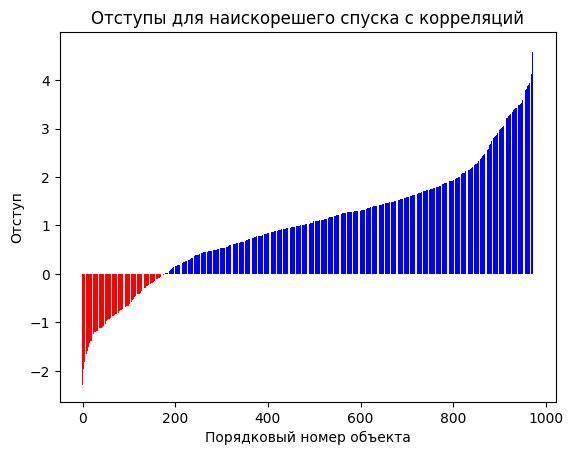

In [ ]:
visualize_margin(w_steepest_corr, X.to_numpy(), y, title="Отступы для наискорешего спуска с корреляций")

In [ ]:
(
    np.linalg.norm(w_steepest),
    np.linalg.norm(w_steepest_corr),
    np.linalg.norm(w_steepest_multistart),
    np.linalg.norm(w_steepest_selection)
)

(1.4583933423345896, 1.5932927471394165, 1.7662789871700493, 1.54599689257615)

## Библиотечная версия

In [ ]:
lib_clf = SGDClassifier(loss="squared_error", penalty="l2", max_iter=100)
lib_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='squared_error', max_iter=100)

In [ ]:
lib_predictions = lib_clf.predict(X_test)
print('Точность классификации:', accuracy_score(y_test, lib_predictions))

Точность классификации: 0.4657534246575342


In [ ]:
lib_clf_steepest = SGDClassifier(loss="squared_error", penalty="l2", max_iter=1000, learning_rate='optimal')
lib_clf_steepest.fit(X_train, y_train)
lib_steepest_predictions = lib_clf_steepest.predict(X_test)
print('Точность классификации:', accuracy_score(y_test, lib_steepest_predictions))

Точность классификации: 0.565068493150685
